In [2]:
using Reactive, Interact

In [3]:
using PyPlot

In [4]:
# matplotlib parameters
matplotlib["rcParams"][:update](["axes.labelsize" => 22,
                                 "axes.titlesize" => 20,
                                 "font.size" => 18,
                                 "legend.fontsize" => 14,
                                 "axes.linewidth" => 1.5,
                                 "font.family" => "serif",
                                 "font.serif" => "Computer Modern Roman",
                                 "xtick.labelsize" => 20,
                                 "xtick.major.size" => 5.5,
                                 "xtick.major.width" => 1.5,
                                 "ytick.labelsize" => 20,
                                 "ytick.major.size" => 5.5,
                                 "ytick.major.width" => 1.5,
                                 "text.usetex" => true,
                                 "figure.autolayout" => true])

In [5]:
import BP

In [6]:
reload("BP")

In [7]:
#g = gcd(sp,sq)
#p = div(sp,g)
#q = div(sq,g)

In [8]:
δpmp(n₀::Int,m₀::Int) = BP.δpmp(45; n0=n₀, m0=m₀)
gausspmp(n₀::Int,m₀::Int) = BP.gausspmp(45; σ=1., n0=n₀, m0=m₀)
homopmp() = BP.homopmp(45)
randpmp(s::Uint) = BP.randpmp(45; seed=s) #1234

randpmp (generic function with 1 method)

In [9]:
#linspace(-4,4,8001)
const ν = linspace(-3.5,-2.5,981);
const P = gausspmp(5,-5);
@time sp = BP.Spectrum(ν,P, :symmetric, 1/11,0.001,0.02);

elapsed time: 34.221872932 seconds (3115398580 bytes allocated, 8.14% gc time)


In [10]:
#full plot range, both in x and y
const xm = [-div(sp.N-1,2):div(sp.N-1,2)];

In [11]:
#zoom in :)
const edge = div(sp.N-1,2)
const st = findin(xm, -edge)[1]
const en = findin(xm, edge)[1];

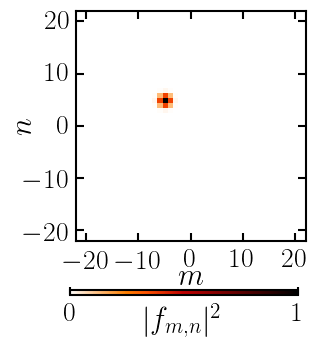

In [12]:
f, ax = plt.subplots(figsize=(3.5, 3.5))
im = ax[:imshow](reshape(abs2(P), sp.N,sp.N)[st:en,st:en], origin="upper", ColorMap("gist_heat_r"), interpolation="none",
                 extent=[-edge, edge, -edge, edge],
                 vmin=0, vmax=1)

ax[:set_ylabel](L"$n$", labelpad=-10)
ax[:set_xlabel](L"$m$", labelpad=-6)
    
cbaxes = f[:add_axes]([0.25, 0.08, 0.65, 0.015])
cbar = f[:colorbar](im, cax=cbaxes, orientation="horizontal")
cbar[:set_ticks]([0, 1])
cbar[:set_ticklabels]([L"$0$", L"$1$"])
cbar[:set_label](L"$|f_{m,n}|^2$", rotation=0, labelpad=-15, y=0.5)
cbar[:solids][:set_edgecolor]("face")

plt.close(f)

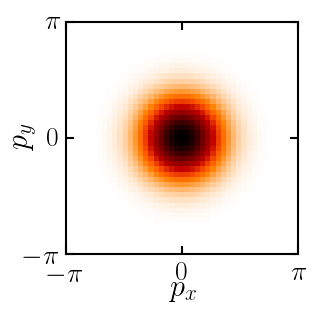

In [13]:
f, ax = plt.subplots(figsize=(3.5, 3.5))
im = ax[:imshow](abs2(fftshift(fft(reshape(P, sp.N,sp.N)))),
                 origin="upper", ColorMap("gist_heat_r"), interpolation="none",
                 extent=[-π, π, -π, π])
ax[:set_xticks]([-π,0,π])
ax[:set_yticks]([-π,0,π])
ax[:set_xticklabels]([L"$-\pi$",L"$0$",L"$\pi$"])
ax[:set_yticklabels]([L"$-\pi$",L"$0$",L"$\pi$"])
ax[:set_xlabel](L"$p_x$", labelpad=-4)
ax[:set_ylabel](L"$p_y$", labelpad=-10)

plt.close(f)

In [14]:
extrema(abs2(fft(P)))

(1.763877581100164e-6,39.478418449286536)

In [15]:
#zoom in :)
const edge = 15
const st = findin(xm, -edge)[1]
const en = findin(xm, edge)[1];

In [16]:
exdef = BP.ExactStates(100, :symmetric);

In [17]:
#exexp = BP.ExactStates(12, :landau, 11, 1/7, 0.2);

In [18]:
#f, ax = plt.subplots(figsize=(10, 4))

#for ω in exdef.νs
#    ax[:axvline](x = ω, color="orange", linewidth="2")
#end 

#for ω in exexp.νs
#    ax[:axvline](x = ω, color="green", ls="dashed")
#end 

#ax[:set_xlim](-3.5,-1.5)

#plt.close(f)

In [19]:
β=99;

In [20]:
state = BP.getstate(exdef, β+1);

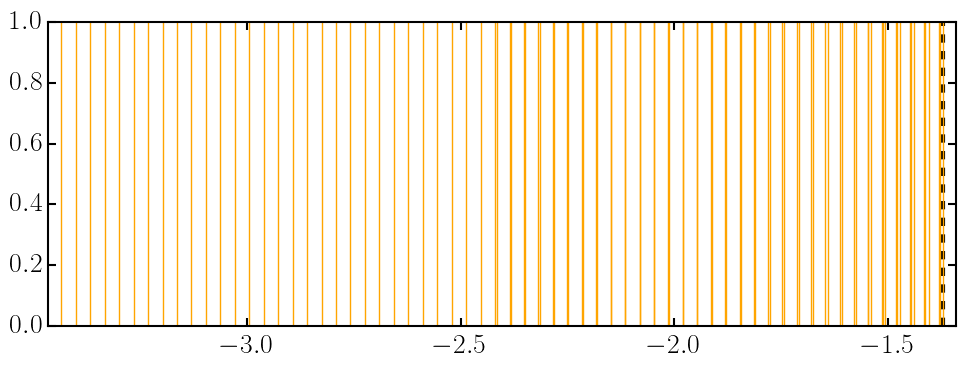

In [21]:
f, ax = plt.subplots(figsize=(10, 4))

ax[:axvline](x = exdef.νs[β+1], color="black", ls="dashed", linewidth="3")

for ω in exdef.νs
    ax[:axvline](x = ω, color="orange")
end 

ax[:set_xlim](exdef.νs[1] - 0.03, exdef.νs[end] + 0.03)

plt.close(f)

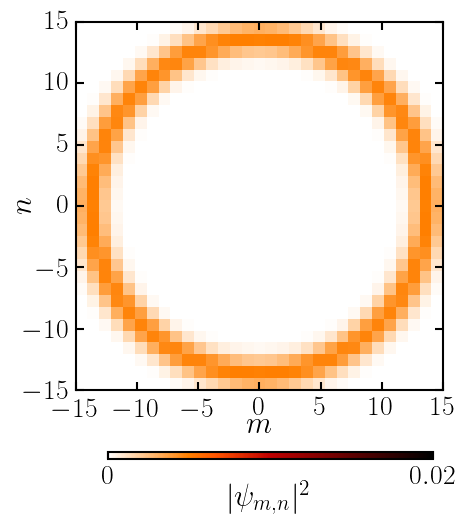

In [22]:
f, ax = plt.subplots(figsize=(5, 5))
im = ax[:imshow](abs2(state)[st:en,st:en], origin="upper", ColorMap("gist_heat_r"), interpolation="none",
                 extent=[-edge, edge, -edge, edge],
                 vmin=0, vmax=0.02)

ax[:set_ylabel](L"$n$", labelpad=-10)
ax[:set_xlabel](L"$m$", labelpad=-6)
    
cbaxes = f[:add_axes]([0.25, 0.03, 0.65, 0.015])
cbar = f[:colorbar](im, cax=cbaxes, orientation="horizontal")
cbar[:set_ticks]([0, 0.02])
cbar[:set_ticklabels]([L"$0$", L"$0.02$"])
cbar[:set_label](L"$|\psi_{m,n}|^2$", rotation=0, labelpad=-5, y=0.5)
cbar[:solids][:set_edgecolor]("face")

plt.close(f)

In [23]:
extrema(abs2(state))

(2.3782360108031843e-35,0.00502484197139964)

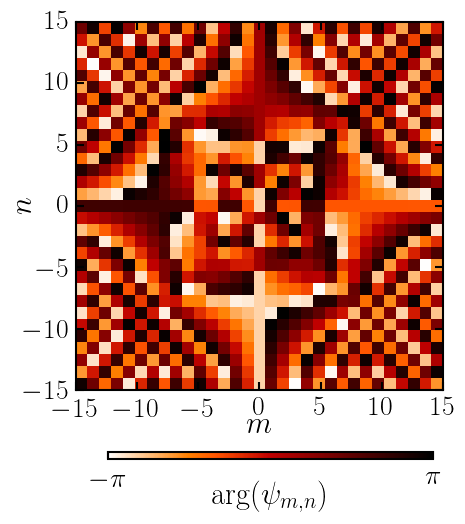

In [24]:
f, ax = plt.subplots(figsize=(5, 5))
im = ax[:imshow](angle(state)[st:en,st:en], origin="upper", ColorMap("gist_heat_r"), interpolation="none",
                 extent=[-edge, edge, -edge, edge],
                 vmin=-π, vmax=π)

ax[:set_ylabel](L"$n$", labelpad=-10)
ax[:set_xlabel](L"$m$", labelpad=-6)
    
cbaxes = f[:add_axes]([0.25, 0.03, 0.65, 0.015])
cbar = f[:colorbar](im, cax=cbaxes, orientation="horizontal")
cbar[:set_ticks]([-π, π])
cbar[:set_ticklabels]([L"$-\pi$", L"$\pi$"])
cbar[:set_label](L"$\arg(\psi_{m,n})$", rotation=0, labelpad=-5, y=0.5)
cbar[:solids][:set_edgecolor]("face")

plt.close(f)

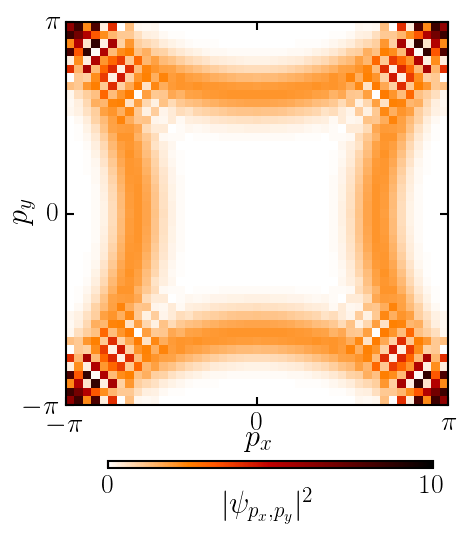

In [25]:
f, ax = plt.subplots(figsize=(5, 5))

im = ax[:imshow](abs2(fftshift(fft(state))),
            origin="upper", ColorMap("gist_heat_r"), interpolation="none",
            extent=[-π, π, -π, π],
            vmin=0, vmax=10)

ax[:set_xticks]([-π,0,π])
ax[:set_yticks]([-π,0,π])

ax[:set_xticklabels]([L"$-\pi$",L"$0$",L"$\pi$"])
ax[:set_yticklabels]([L"$-\pi$",L"$0$",L"$\pi$"])

ax[:set_xlabel](L"$p_x$", labelpad=-4)
ax[:set_ylabel](L"$p_y$", labelpad=-10)

cbaxes = f[:add_axes]([0.25, 0.03, 0.65, 0.015])
cbar = f[:colorbar](im, cax=cbaxes, orientation="horizontal")
cbar[:set_ticks]([0, 10])
cbar[:set_label](L"$|\psi_{p_x,p_y}|^2$", rotation=0, labelpad=-5, y=0.5)
cbar[:solids][:set_edgecolor]("face")


plt.close(f)

In [26]:
extrema(abs2(fft(state)))

(4.651567631442272e-28,8.70585241218944)

In [27]:
#zoom in :)
const edge = div(sp.N-1,2)
const st = findin(xm, -edge)[1]
const en = findin(xm, edge)[1];

In [28]:
ω₁=-3.2;
ω₂=-2.8;

In [29]:
i₁ = indmin(abs(sp.νs .- ω₁));
i₂ = indmin(abs(sp.νs .- ω₂));

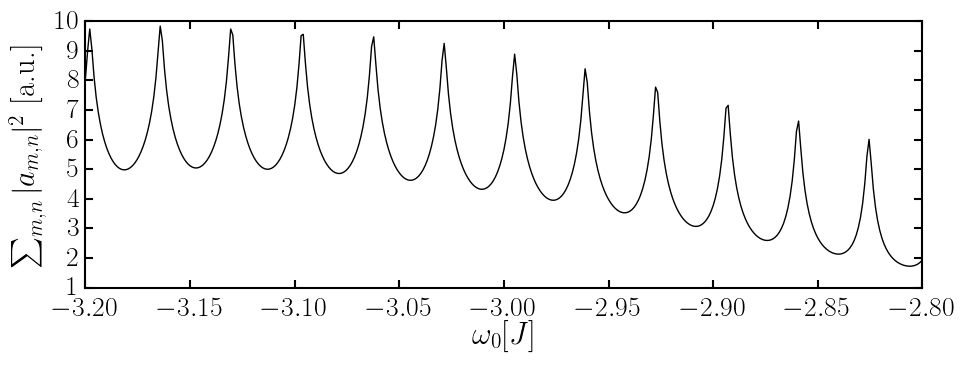

In [30]:
#plot spectrum
f, ax = plt.subplots(figsize=(10, 4))
ax[:plot](sp.νs[i₁:i₂],log(sp.intensity[i₁:i₂]),"k") 

ax[:set_xlim](ω₁,ω₂)

ax[:set_xlabel](L"$\omega_0 [J]$")
ax[:set_ylabel](L"$\sum_{m,n} |a_{m,n}|^2$ [a.u.]")

plt.close(f)

In [31]:
sω = slider(ν[1]:0.002:ν[end], label="ω")

Slider{Float64}([Input{Float64}] -3.0,"ω",-3.0,-3.5:0.002:-2.5)

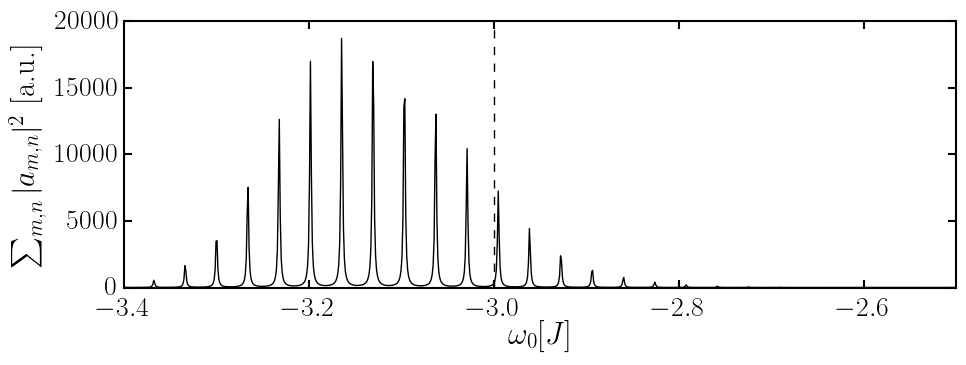

In [31]:
#plot spectrum
f1, ax1 = plt.subplots(figsize=(10, 4))
lift(ω -> withfig(()->begin
    ax1[:cla]()
    ax1[:plot](sp.νs,sp.intensity,"k") 
    ax1[:axvline](x=ω,color="k",ls="dashed")
    ax1[:set_xlim](-3.4,sp.νs[end])
    ax1[:set_xlabel](L"$\omega_0 [J]$")
    ax1[:set_ylabel](L"$\sum_{m,n} |a_{m,n}|^2$ [a.u.]")
    end,f1,clear=false), sω)

In [32]:
display(sω)

Slider{Float64}([Input{Float64}] -3.0,"ω",-3.0,-3.5:0.002:-2.5)

In [33]:
sp.νs

981-element Array{Float64,1}:
 -3.5    
 -3.49898
 -3.49796
 -3.49694
 -3.49592
 -3.4949 
 -3.49388
 -3.49286
 -3.49184
 -3.49082
 -3.4898 
 -3.48878
 -3.48776
  ⋮      
 -2.51122
 -2.5102 
 -2.50918
 -2.50816
 -2.50714
 -2.50612
 -2.5051 
 -2.50408
 -2.50306
 -2.50204
 -2.50102
 -2.5    

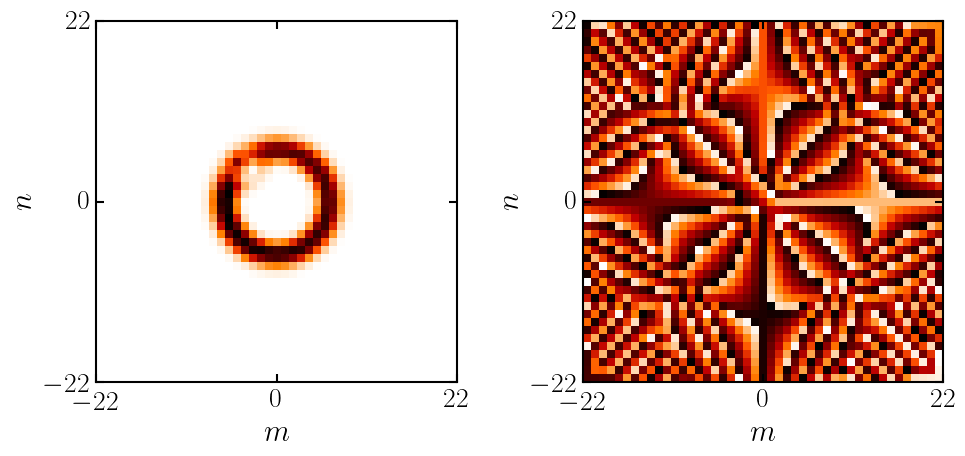

In [33]:
#plot w.f. in real space
f2, axes = plt.subplots(1,2, figsize=(10, 5))
lift(ω -> withfig(()->begin
    axes[1][:cla]()
    axes[2][:cla]()
    axes[1][:imshow](abs2(BP.getstate(sp, ω))[st:en,st:en],
                     origin="upper", ColorMap("gist_heat_r"), interpolation="none",
                     extent=[-edge, edge, -edge, edge])
    axes[2][:imshow](angle(BP.getstate(sp, ω))[st:en,st:en],
                     origin="upper", ColorMap("gist_heat_r"), interpolation="none",
                     extent=[-edge, edge, -edge, edge])
    for ax in axes
        ax[:set_xlabel](L"$m$")
        ax[:set_ylabel](L"$n$")
        ax[:set_xticks]([-edge,0, edge])
        ax[:set_yticks]([-edge,0, edge])
    end
    end,f2,clear=false), sω)

In [34]:
display(sω)

Slider{Float64}([Input{Float64}] -3.0,"ω",-3.0,-3.5:0.002:-2.5)

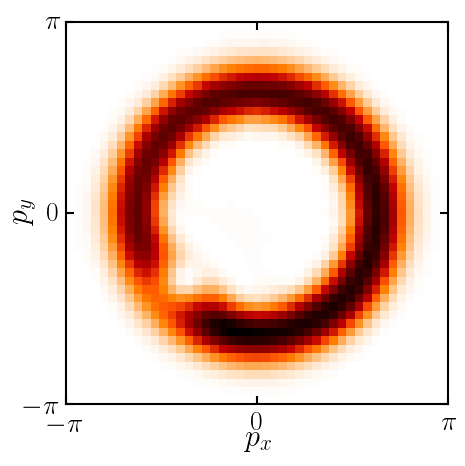

In [35]:
#plot w.f. in mom space
f3, ax3 = plt.subplots(figsize=(5, 5))
lift(ω -> withfig(()->begin
    ax3[:cla]()
    ax3[:imshow](abs2(fftshift(fft(BP.getstate(sp, ω)))),
                     origin="upper", ColorMap("gist_heat_r"), interpolation="none",
                     extent=[-π, π, -π, π])
    ax3[:set_xticks]([-π,0,π])
    ax3[:set_yticks]([-π,0,π])
    ax3[:set_xticklabels]([L"$-\pi$",L"$0$",L"$\pi$"])
    ax3[:set_yticklabels]([L"$-\pi$",L"$0$",L"$\pi$"])
    ax3[:set_xlabel](L"$p_x$", labelpad=-4)
    ax3[:set_ylabel](L"$p_y$", labelpad=-10)
    end,f3,clear=false), sω)

In [36]:
k = linspace(-π, π, 200);

In [37]:
X = BP.getstate(sp, sω.value);

In [38]:
Xk = BP.myfft2(X, k,k);

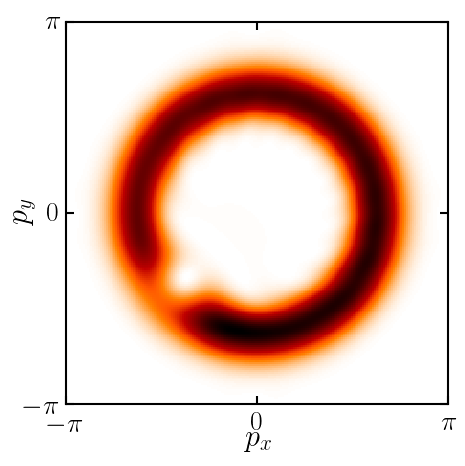

In [39]:
#plot w.f. in mom space
f, ax = plt.subplots(figsize=(5, 5))
ax[:imshow](abs2(Xk),
            origin="upper", ColorMap("gist_heat_r"), interpolation="none",
            extent=[-π, π, -π, π])
ax[:set_xticks]([-π,0,π])
ax[:set_yticks]([-π,0,π])
ax[:set_xticklabels]([L"$-\pi$",L"$0$",L"$\pi$"])
ax[:set_yticklabels]([L"$-\pi$",L"$0$",L"$\pi$"])
ax[:set_xlabel](L"$p_x$", labelpad=-4)
ax[:set_ylabel](L"$p_y$", labelpad=-10)

plt.close(f)

In [40]:
extrema(abs2(Xk))

(1.6260473330970274e-9,1643.9067769198693)

In [41]:
## function extractpath(l1::Int,l2::Int,c1::Int,c2::Int, M::Matrix{Float64})
##     path=Float64[]
##     append!(path, M[l1:l2,c1])
##     append!(path, vec(M[l2,c1:c2])[2:end])
##     append!(path, M[l2:-1:l1,c2][2:end])
##     append!(path, vec(M[l1,c2:-1:c1])[2:end-1])
##     path
## end